In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import koreanize_matplotlib

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submit = pd.read_csv("./sample_submission.csv")

In [3]:
display(train["대출기간"].value_counts())
display(train["근로기간"].value_counts())
display(train["주택소유상태"].value_counts())
display(train["대출목적"].value_counts())
display(train["대출등급"].value_counts())

대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [4]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [6]:
# 근로기간 전처리

train["근로기간"] = train["근로기간"].str.replace("years", "").str.replace("year", "")

train["근로기간"] = train["근로기간"].str.replace(" ", "")

train["근로기간"] = train["근로기간"].str.replace("10+", "10_over")

train["근로기간"] = train["근로기간"].str.replace("<1", "1_under")

In [7]:
# features = train.columns[1:-1]
# object_columns = []
# number_columns = []

# for feature in features:
#     if train[feature].dtype == "object":
#         object_columns.append(feature)
#     else:
#         number_columns.append(feature)

# print(f'object_columns : {object_columns}')
# print(f'number_columns : {number_columns}')


대출기간별 그래프 확인

In [8]:
train["대출기간"].value_counts()

대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64

In [9]:
train[train["부채_대비_소득_비율"] > 100]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C
29129,TRAIN_29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62125,TRAIN_62125,18000000,36 months,Unknown,MORTGAGE,10440000,120.66,26,부채 통합,0,396456,200328.0,0.0,0.0,D
62765,TRAIN_62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D
81970,TRAIN_81970,14400000,60 months,Unknown,MORTGAGE,11694000,125.25,53,부채 통합,0,302736,412116.0,0.0,0.0,D
83954,TRAIN_83954,24000000,60 months,1_under,RENT,32400000,100.09,16,부채 통합,0,248064,339732.0,0.0,0.0,E


In [10]:
train[train["연간소득"] == 0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [11]:
train[train["근로기간"] == "Unknown"]["대출등급"].value_counts()

대출등급
B    1742
C    1628
A     934
D     872
E     378
F      92
G      25
Name: count, dtype: int64

대출기간별 그래프 확인

<Axes: xlabel='대출기간', ylabel='count'>

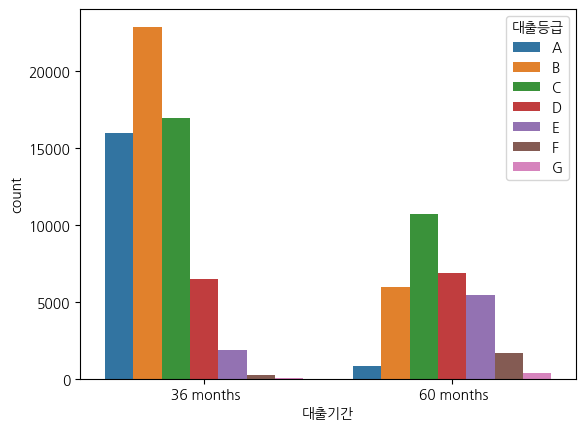

In [12]:
sns.countplot(data=train, x="대출기간", hue="대출등급", hue_order=["A","B","C","D","E","F","G"])

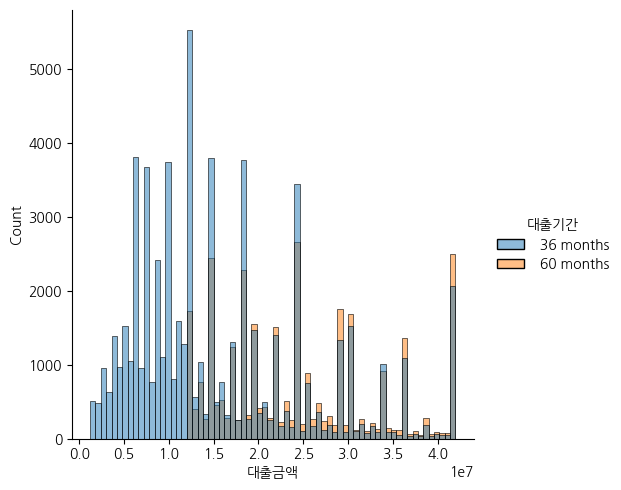

In [13]:
sns.displot(data=train, x="대출금액", hue="대출기간")

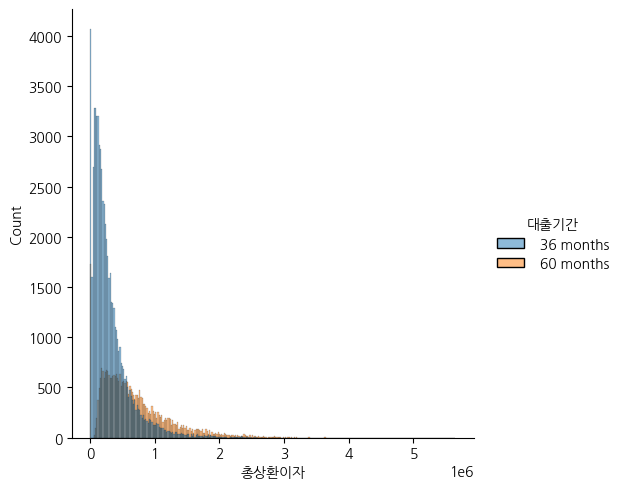

In [14]:
sns.displot(data=train, x="총상환이자", hue="대출기간")

주택소유상태별 그래프 확인

In [15]:
train["주택소유상태"].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

In [16]:
train[train["주택소유상태"] == "ANY"]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10_over,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


<Axes: xlabel='주택소유상태', ylabel='count'>

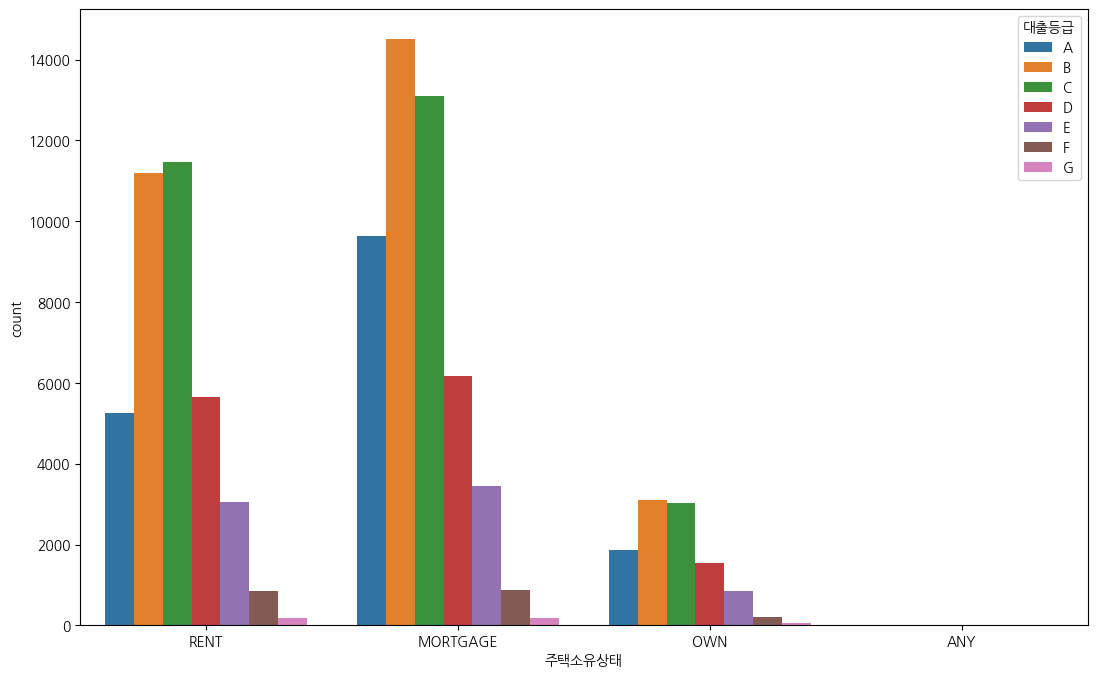

In [17]:
plt.figure(figsize=(13,8))
sns.countplot(data=train, x="주택소유상태", hue="대출등급", hue_order=["A","B","C","D","E","F","G"])

대출목적에 따른 그래프확인

In [18]:
train["대출목적"].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

<Axes: xlabel='대출목적', ylabel='count'>

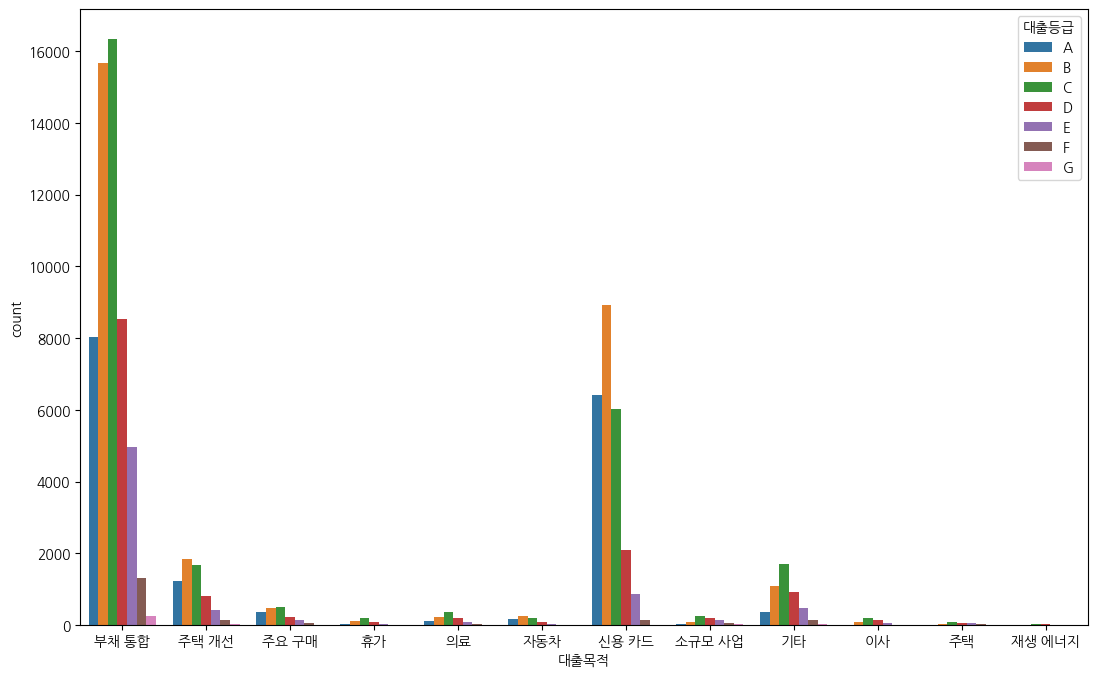

In [19]:
plt.figure(figsize=(13,8))
sns.countplot(data=train, x="대출목적", hue="대출등급", hue_order=["A","B","C","D","E","F","G"])

부채 통합 : 여러 부채를 하나의 대출로 결합하는 과정 -> 지불을 단순화하고 잠재적으로 이자율을 낮추는 것

<Axes: xlabel='대출목적', ylabel='연간소득'>

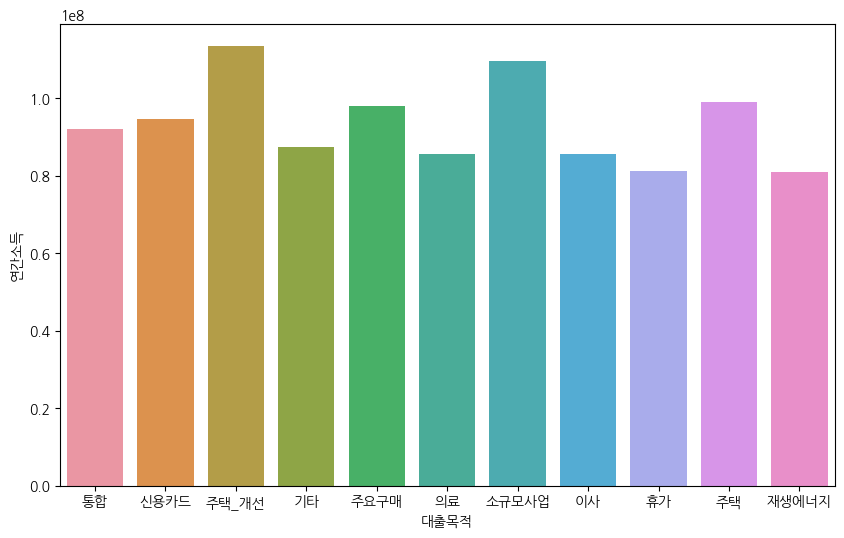

In [20]:
plt.figure(figsize=(10,6))

통합 = train[train["대출목적"] == "부채 통합"]["연간소득"].mean()
신용카드 = train[train["대출목적"] == "신용 카드"]["연간소득"].mean()
주택_개선 = train[train["대출목적"] == "주택 개선"]["연간소득"].mean()
기타 = train[train["대출목적"] == "기타"]["연간소득"].mean()
주요구매 = train[train["대출목적"] == "주요 구매"]["연간소득"].mean()
의료 = train[train["대출목적"] == "의료"]["연간소득"].mean()
소규모사업 = train[train["대출목적"] == "소규모 사업"]["연간소득"].mean()
이사 = train[train["대출목적"] == "이사"]["연간소득"].mean()
휴가 = train[train["대출목적"] == "휴가"]["연간소득"].mean()
주택 = train[train["대출목적"] == "주택"]["연간소득"].mean()
재생에너지 = train[train["대출목적"] == "재생 에너지"]["연간소득"].mean()


data = {'대출목적': ['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'],
        '연간소득': [통합, 신용카드, 주택_개선, 기타, 주요구매, 의료, 소규모사업, 이사, 휴가, 주택, 재생에너지]}
df_means2 = pd.DataFrame(data)

sns.barplot(data=df_means2, x="대출목적", y="연간소득", order=['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'])

<Axes: xlabel='대출목적', ylabel='대출금액'>

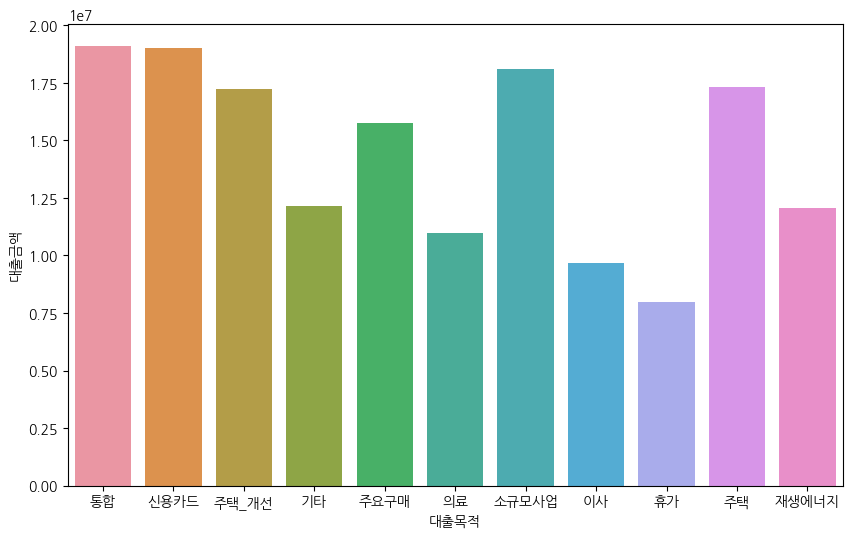

In [21]:
plt.figure(figsize=(10,6))

통합 = train[train["대출목적"] == "부채 통합"]["대출금액"].mean()
신용카드 = train[train["대출목적"] == "신용 카드"]["대출금액"].mean()
주택_개선 = train[train["대출목적"] == "주택 개선"]["대출금액"].mean()
기타 = train[train["대출목적"] == "기타"]["대출금액"].mean()
주요구매 = train[train["대출목적"] == "주요 구매"]["대출금액"].mean()
의료 = train[train["대출목적"] == "의료"]["대출금액"].mean()
소규모사업 = train[train["대출목적"] == "소규모 사업"]["대출금액"].mean()
이사 = train[train["대출목적"] == "이사"]["대출금액"].mean()
휴가 = train[train["대출목적"] == "휴가"]["대출금액"].mean()
주택 = train[train["대출목적"] == "주택"]["대출금액"].mean()
재생에너지 = train[train["대출목적"] == "재생 에너지"]["대출금액"].mean()


data = {'대출목적': ['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'],
        '대출금액': [통합, 신용카드, 주택_개선, 기타, 주요구매, 의료, 소규모사업, 이사, 휴가, 주택, 재생에너지]}
df_means2 = pd.DataFrame(data)

sns.barplot(data=df_means2, x="대출목적", y="대출금액", order=['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'])

<Axes: xlabel='대출목적', ylabel='총연체금액'>

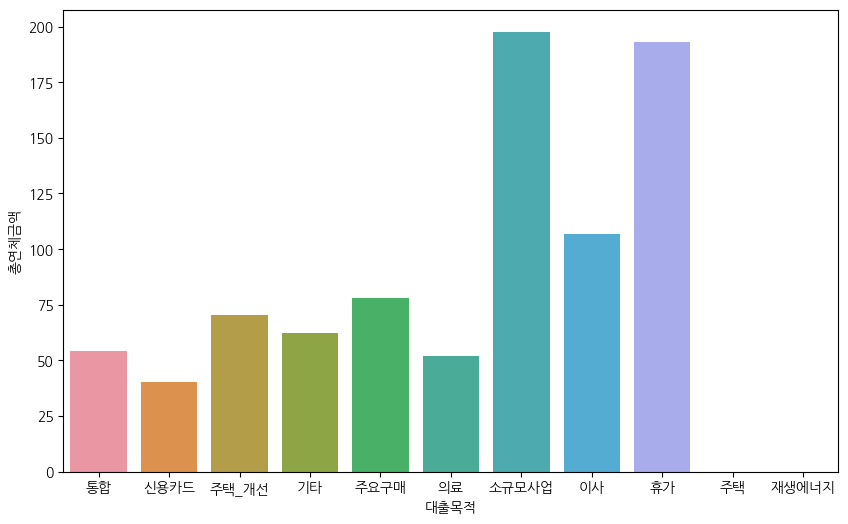

In [22]:
plt.figure(figsize=(10,6))

통합 = train[train["대출목적"] == "부채 통합"]["총연체금액"].mean()
신용카드 = train[train["대출목적"] == "신용 카드"]["총연체금액"].mean()
주택_개선 = train[train["대출목적"] == "주택 개선"]["총연체금액"].mean()
기타 = train[train["대출목적"] == "기타"]["총연체금액"].mean()
주요구매 = train[train["대출목적"] == "주요 구매"]["총연체금액"].mean()
의료 = train[train["대출목적"] == "의료"]["총연체금액"].mean()
소규모사업 = train[train["대출목적"] == "소규모 사업"]["총연체금액"].mean()
이사 = train[train["대출목적"] == "이사"]["총연체금액"].mean()
휴가 = train[train["대출목적"] == "휴가"]["총연체금액"].mean()
주택 = train[train["대출목적"] == "주택"]["총연체금액"].mean()
재생에너지 = train[train["대출목적"] == "재생 에너지"]["총연체금액"].mean()


data = {'대출목적': ['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'],
        '총연체금액': [통합, 신용카드, 주택_개선, 기타, 주요구매, 의료, 소규모사업, 이사, 휴가, 주택, 재생에너지]}
df_means2 = pd.DataFrame(data)

sns.barplot(data=df_means2, x="대출목적", y="총연체금액", order=['통합', '신용카드', '주택_개선', '기타', '주요구매', '의료', '소규모사업', '이사', '휴가', '주택', '재생에너지'])

근로기간

In [23]:
train["근로기간"].value_counts()

근로기간
10_over    32481
2           8450
1_under     8144
3           7670
1           6305
Unknown     5671
5           5665
4           5588
8           4888
6           3874
7           3814
9           3744
Name: count, dtype: int64

<Axes: xlabel='근로기간', ylabel='count'>

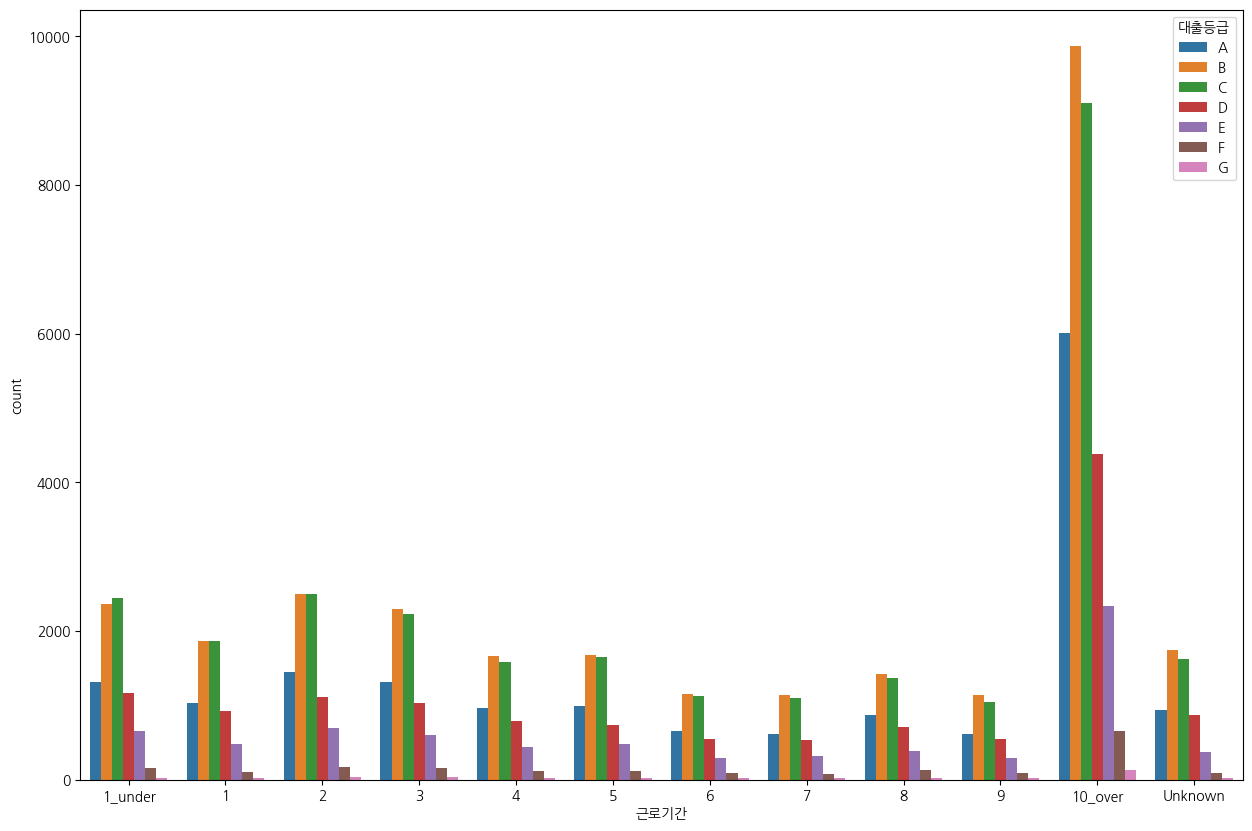

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data=train, x="근로기간", hue="대출등급", order=["1_under","1","2","3","4","5","6","7","8","9","10_over","Unknown"], hue_order=["A","B","C","D","E","F","G"])

<Axes: xlabel='근로기간', ylabel='count'>

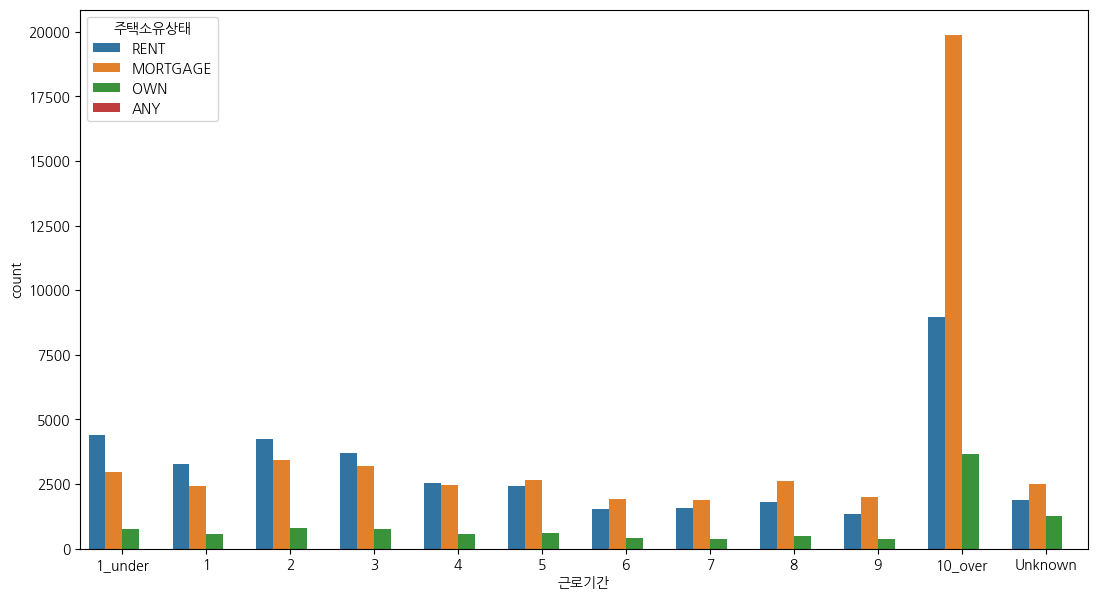

In [25]:
plt.figure(figsize=(13,7))
sns.countplot(data=train, x="근로기간", hue="주택소유상태", order=["1_under","1","2","3","4","5","6","7","8","9","10_over","Unknown"])

<Axes: xlabel='근로기간', ylabel='연간소득'>

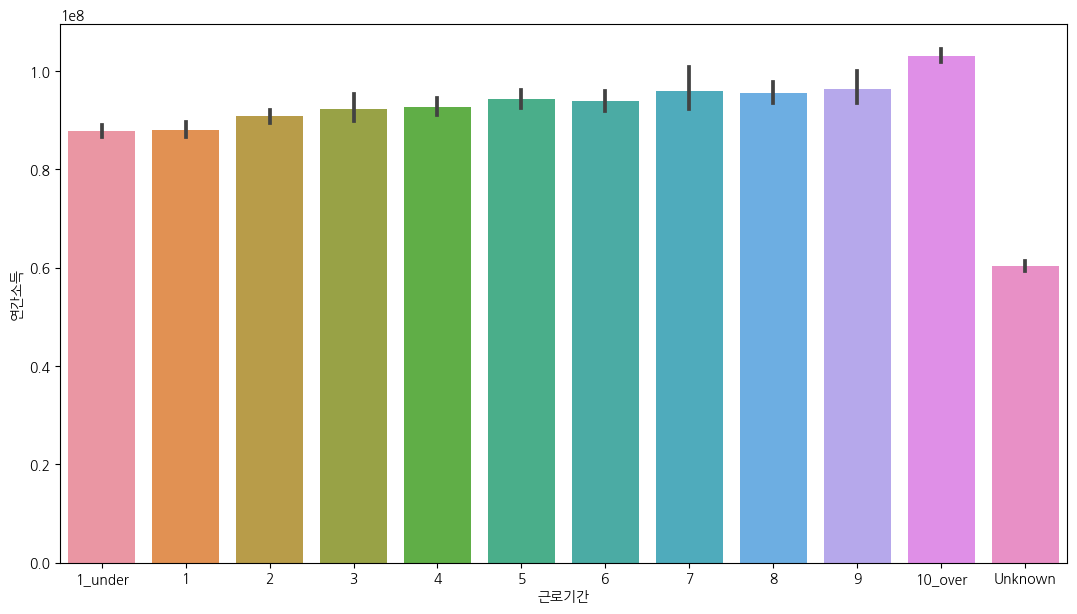

In [26]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="근로기간", y="연간소득", order=["1_under","1","2","3","4","5","6","7","8","9","10_over","Unknown"])

<Axes: xlabel='근로기간', ylabel='대출금액'>

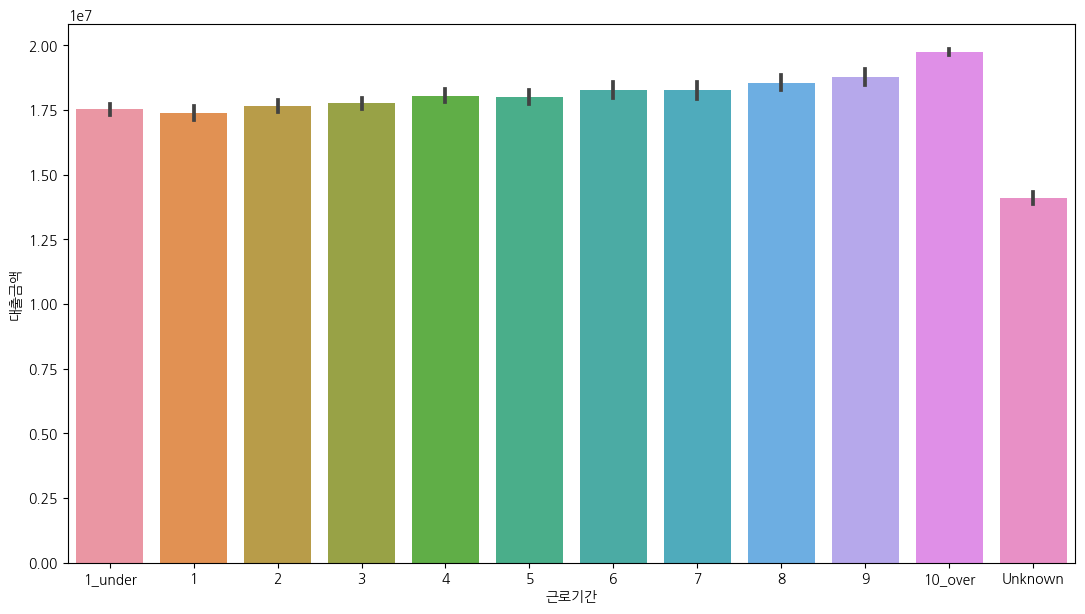

In [27]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="근로기간", y="대출금액", order=["1_under","1","2","3","4","5","6","7","8","9","10_over","Unknown"])

대출금액과 대출등급

<Axes: xlabel='대출등급', ylabel='대출금액'>

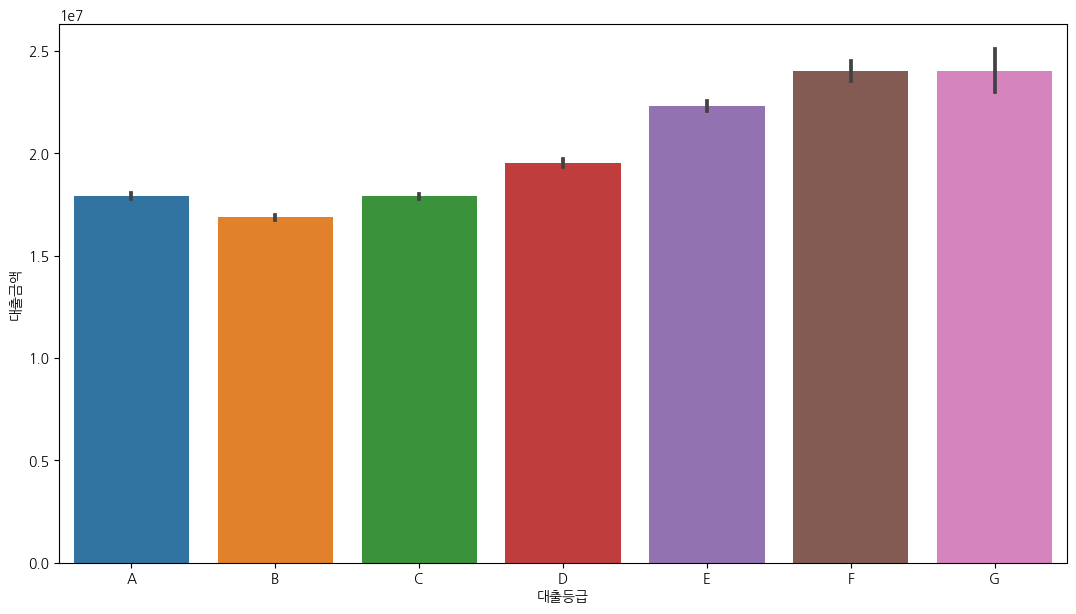

In [28]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="대출금액", order=["A","B","C","D","E","F","G"])

In [29]:
train["대출기간"] = train["대출기간"].str.replace(" months", "").astype(int)
train["월_대출금액"] = round(train["대출금액"] / train["대출기간"],0).astype(int)

<Axes: xlabel='대출등급', ylabel='월_대출금액'>

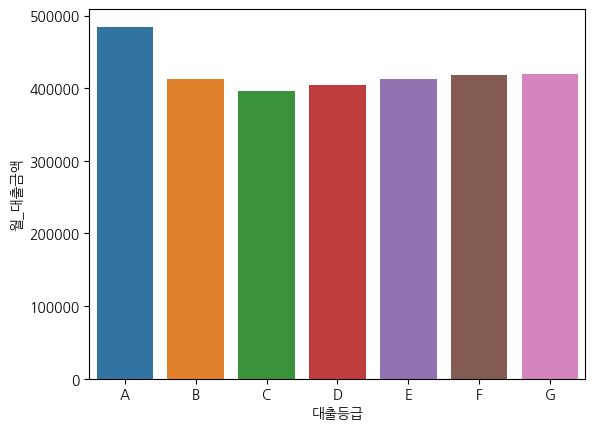

In [30]:
A = train[train["대출등급"] == "A"]["월_대출금액"].mean()
B = train[train["대출등급"] == "B"]["월_대출금액"].mean()
C = train[train["대출등급"] == "C"]["월_대출금액"].mean()
D = train[train["대출등급"] == "D"]["월_대출금액"].mean()
E = train[train["대출등급"] == "E"]["월_대출금액"].mean()
F = train[train["대출등급"] == "F"]["월_대출금액"].mean()
G = train[train["대출등급"] == "G"]["월_대출금액"].mean()

data = {'대출등급': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        '월_대출금액': [A, B, C, D, E, F, G]}
df_means = pd.DataFrame(data)

sns.barplot(data=df_means, x="대출등급", y="월_대출금액", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='연간소득'>

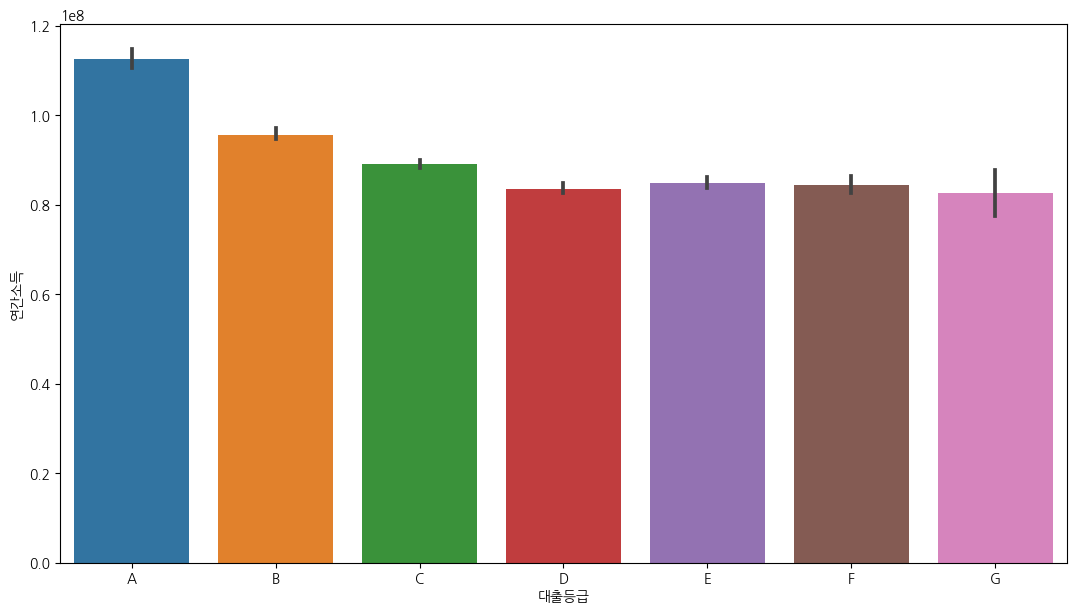

In [31]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="연간소득", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='부채_대비_소득_비율'>

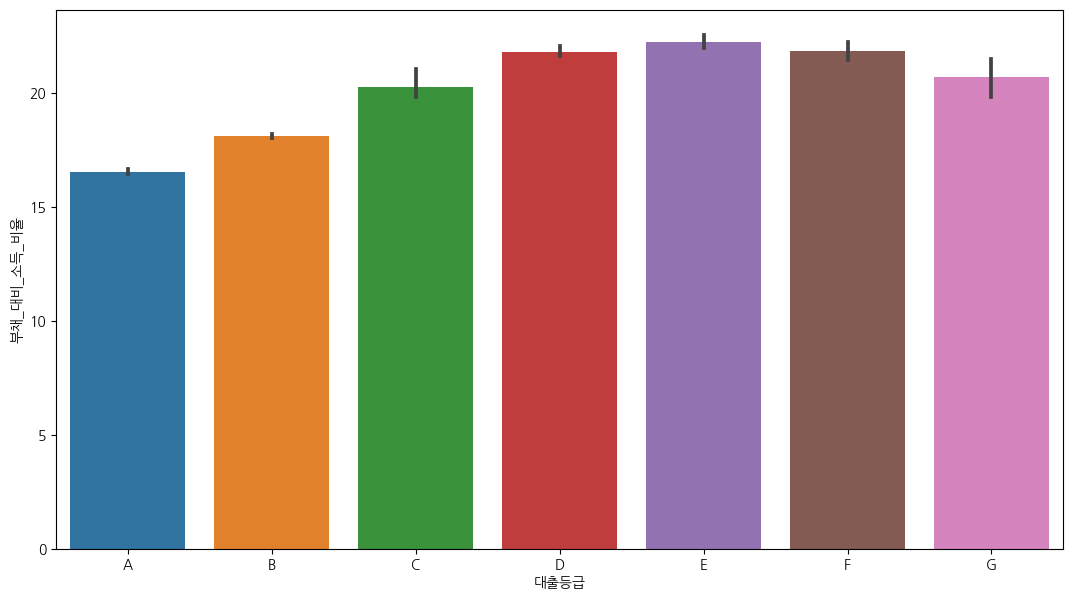

In [32]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="부채_대비_소득_비율", order=["A","B","C","D","E","F","G"])

총계좌수와 대출등급의 관계, 연체계좌로 나누기!

<Axes: xlabel='대출등급', ylabel='총계좌수'>

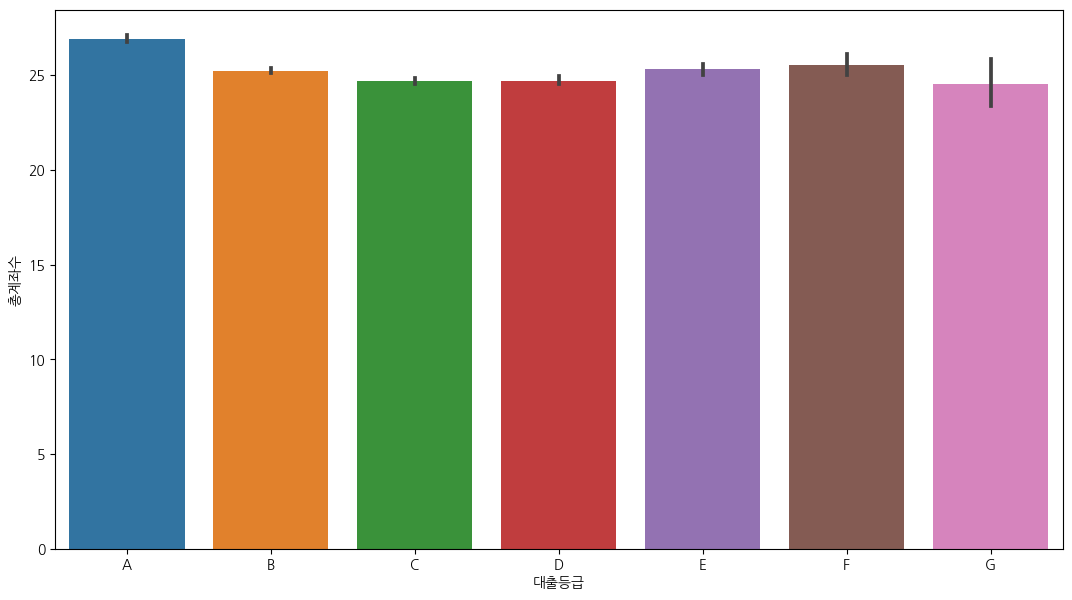

In [33]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총계좌수", order=["A","B","C","D","E","F","G"])

In [34]:
train["계좌"] = train["총계좌수"] / (train["연체계좌수"] + 1)

<Axes: xlabel='대출등급', ylabel='계좌'>

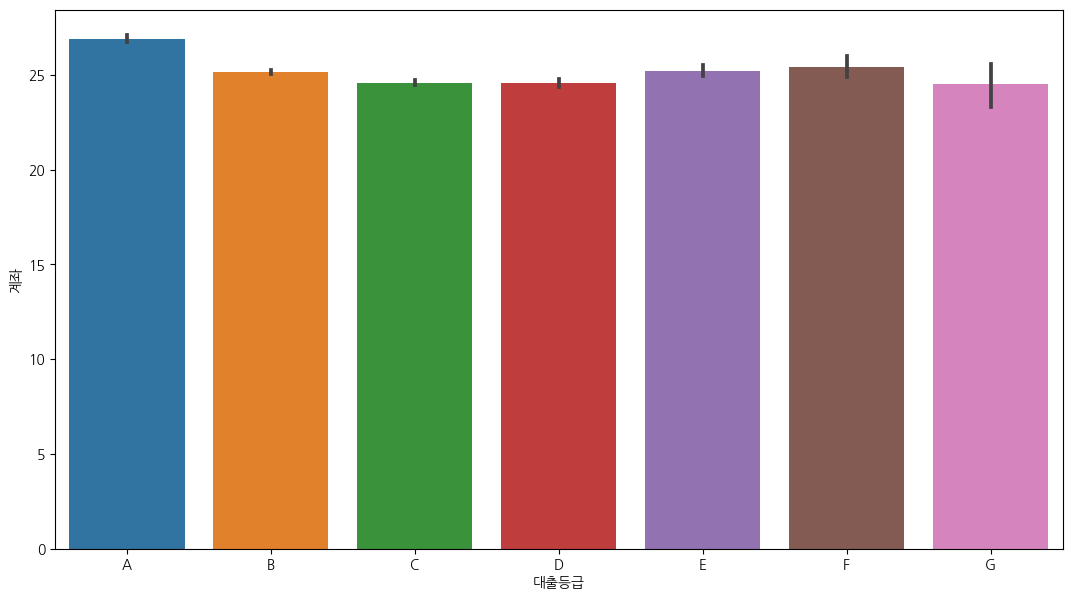

In [35]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="계좌", order=["A","B","C","D","E","F","G"])

In [36]:
display(train.groupby("대출등급")["계좌"].mean())
display(train.groupby("대출등급")["총계좌수"].mean())

대출등급
A    26.891486
B    25.153017
C    24.584457
D    24.586778
E    25.224186
F    25.438502
G    24.502381
Name: 계좌, dtype: float64

대출등급
A    26.910684
B    25.223375
C    24.695073
D    24.705107
E    25.320642
F    25.543501
G    24.550000
Name: 총계좌수, dtype: float64

In [37]:
for i in range(0,6):
    print(train.groupby("대출등급")["계좌"].mean()[i] - train.groupby("대출등급")["계좌"].mean()[i+1])
     

1.738468493515267
0.5685599195536071
-0.0023205974951991948
-0.6374083897182636
-0.21431583384575603
0.9361212652921971


In [38]:
for i in range(0,6):
    print(train.groupby("대출등급")["총계좌수"].mean()[i] - train.groupby("대출등급")["총계좌수"].mean()[i+1])
     

1.6873093830314758
0.5283021446344023
-0.01003413756210847
-0.6155347435570597
-0.22285868419389843
0.9935005117707263


총상환원금과 총상환이자와의 관계, 그에 따른 대출등급

<Axes: xlabel='대출등급', ylabel='총상환원금'>

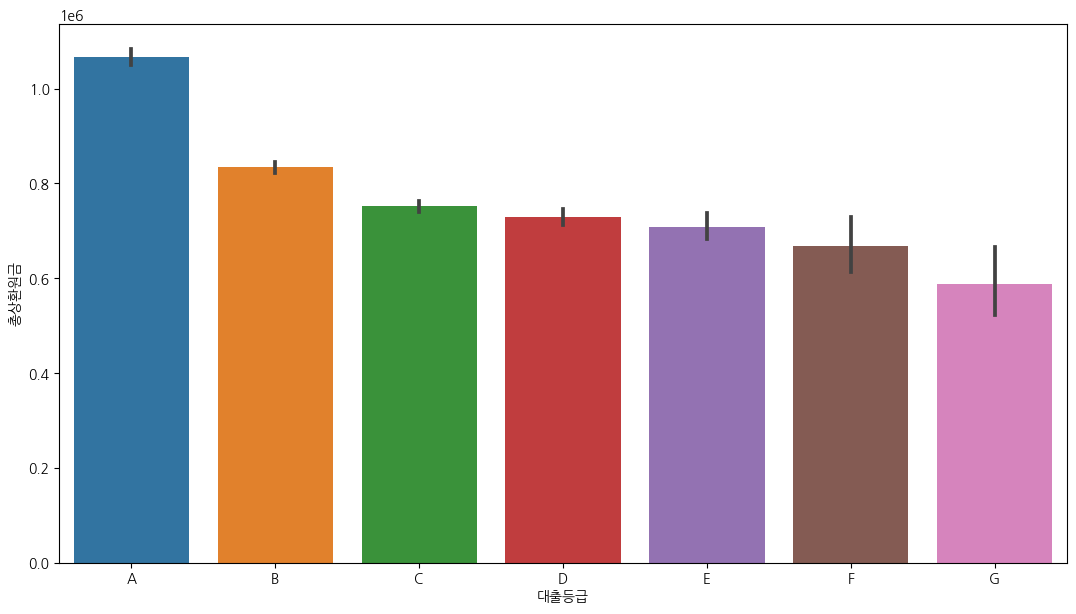

In [39]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총상환원금", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='총상환이자'>

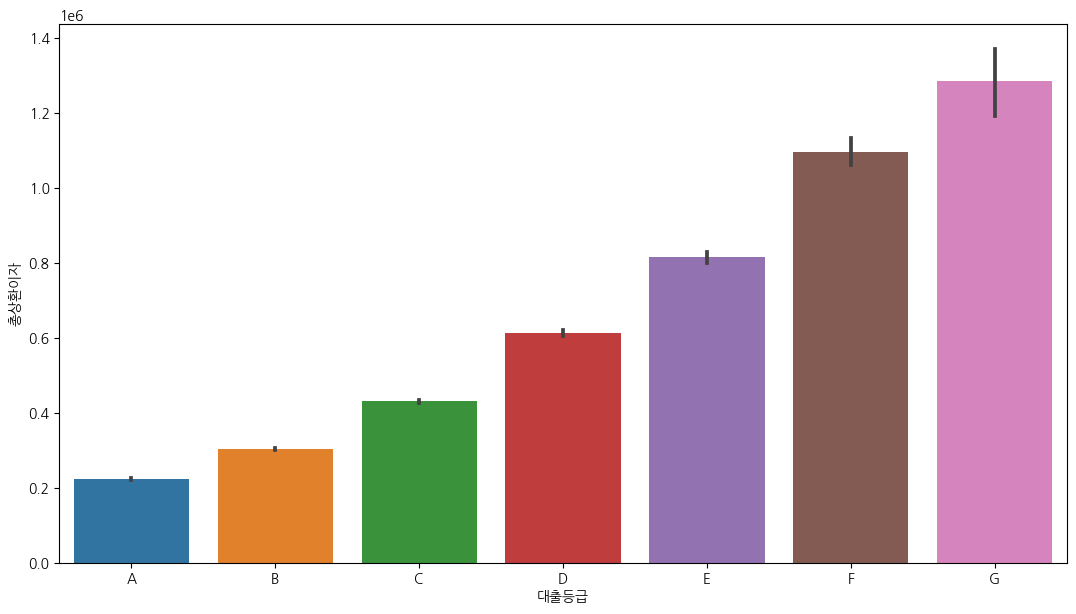

In [40]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총상환이자", order=["A","B","C","D","E","F","G"])

In [41]:
test_1 = train[(train["총상환이자"] > 0)]
test_2= train[(train["총상환이자"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

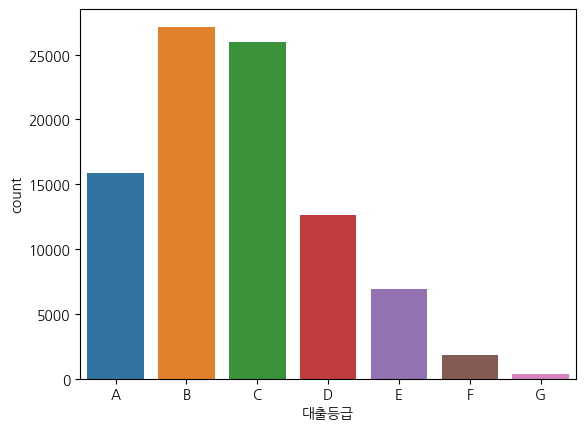

In [42]:
sns.countplot(data=test_1, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

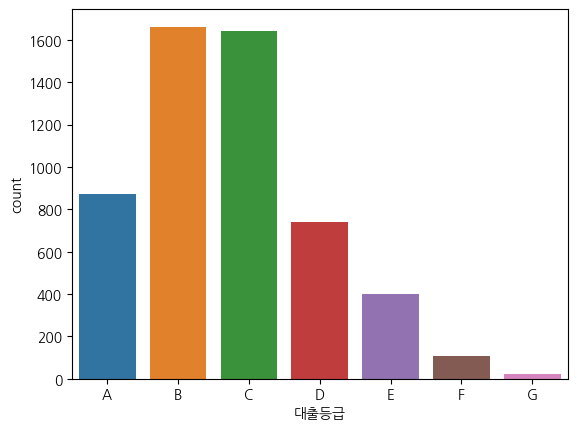

In [43]:
sns.countplot(data=test_2, x="대출등급", order=["A","B","C","D","E","F","G"])

In [44]:
test_3 = train[(train["총상환이자"] == train["총상환원금"])]
test_4 = train[(train["총상환이자"] > train["총상환원금"])]
test_5 = train[(train["총상환이자"] < train["총상환원금"])]

<Axes: xlabel='대출등급', ylabel='count'>

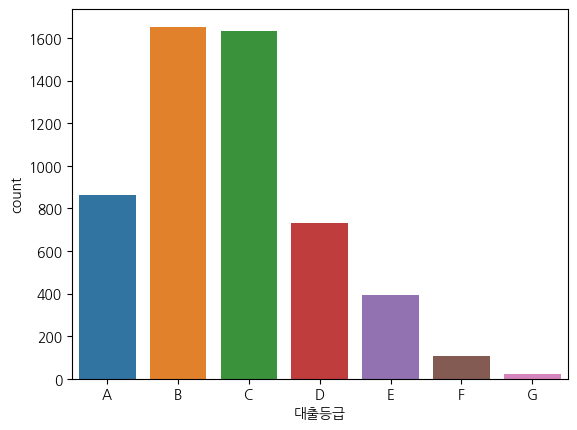

In [45]:
sns.countplot(data=test_3, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

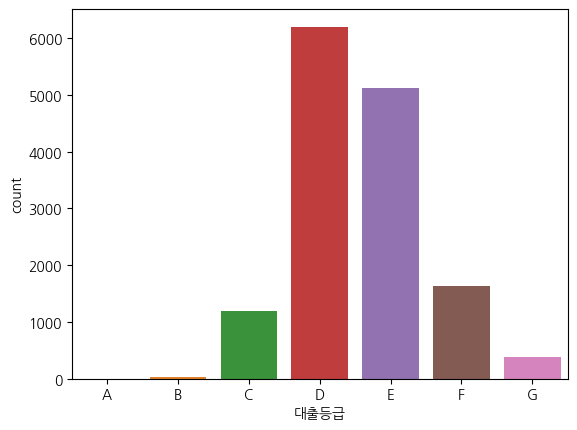

In [46]:
sns.countplot(data=test_4, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

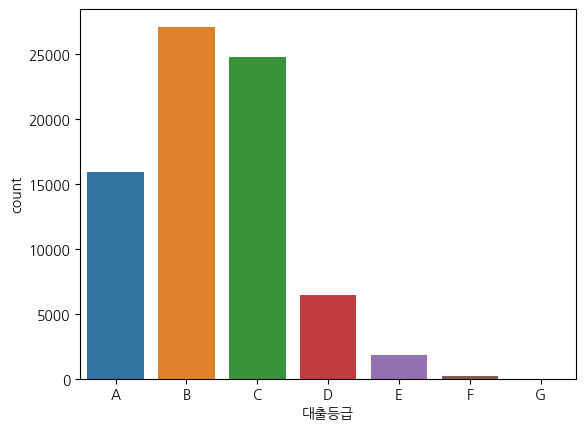

In [47]:
sns.countplot(data=test_5, x="대출등급", order=["A","B","C","D","E","F","G"])

대출등급과 총연체금액 비교

<Axes: xlabel='대출등급', ylabel='총연체금액'>

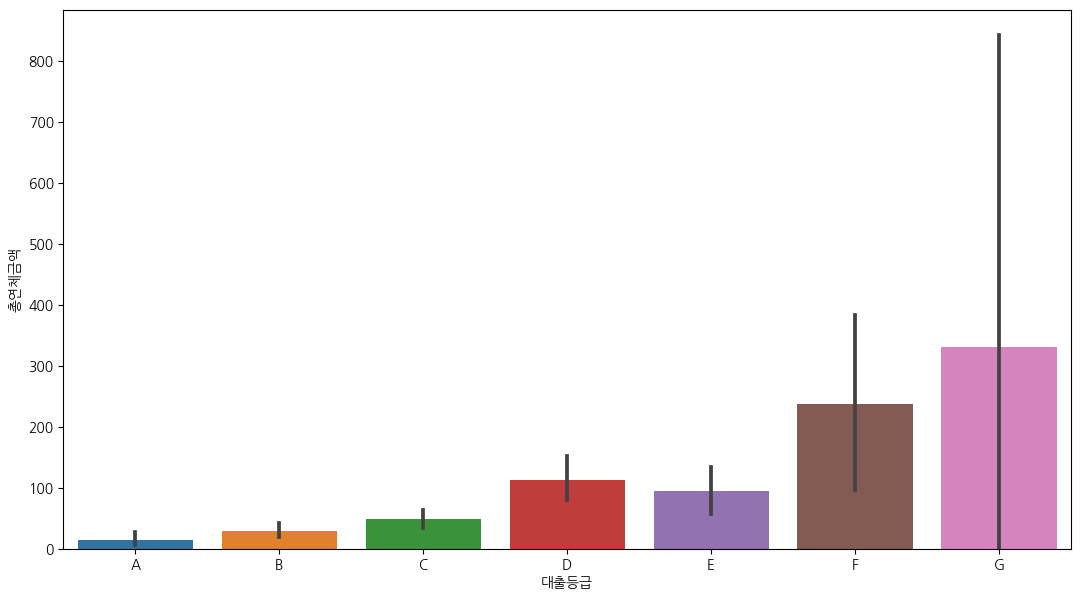

In [48]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총연체금액", order=["A","B","C","D","E","F","G"])

In [49]:
test_a = train[(train["총연체금액"] > 0)]
test_b = train[(train["총연체금액"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

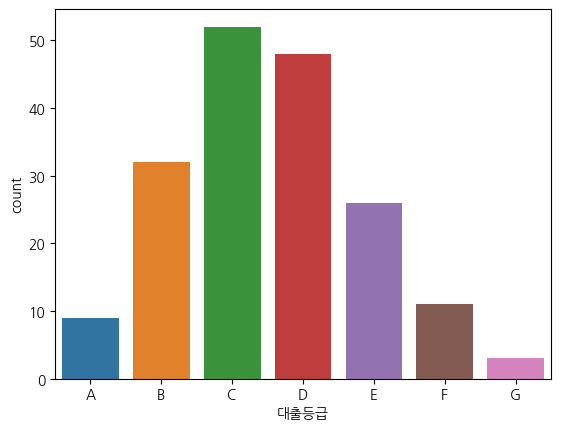

In [50]:
sns.countplot(data=test_a, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

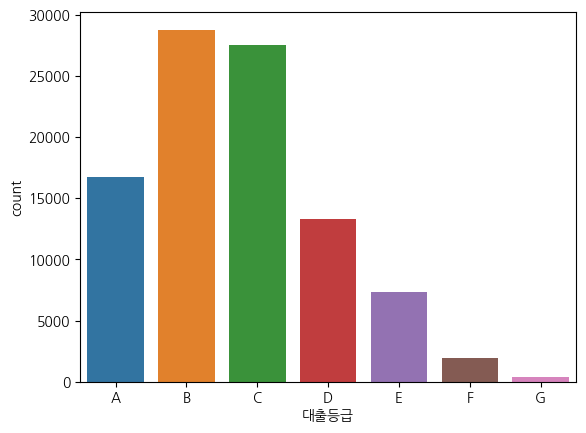

In [51]:
sns.countplot(data=test_b, x="대출등급", order=["A","B","C","D","E","F","G"])

대출등급과 최근 2년간 연체 횟수 비교

<Axes: xlabel='대출등급', ylabel='최근_2년간_연체_횟수'>

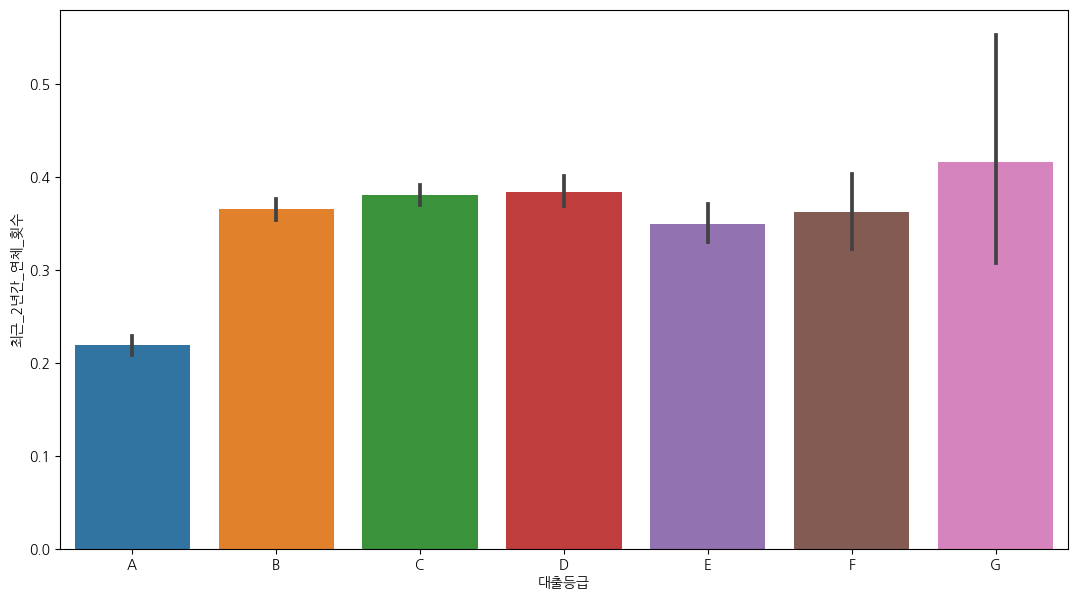

In [52]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="최근_2년간_연체_횟수", order=["A","B","C","D","E","F","G"])

In [53]:
test_c = train[(train["최근_2년간_연체_횟수"] > 0)]
test_d = train[(train["최근_2년간_연체_횟수"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

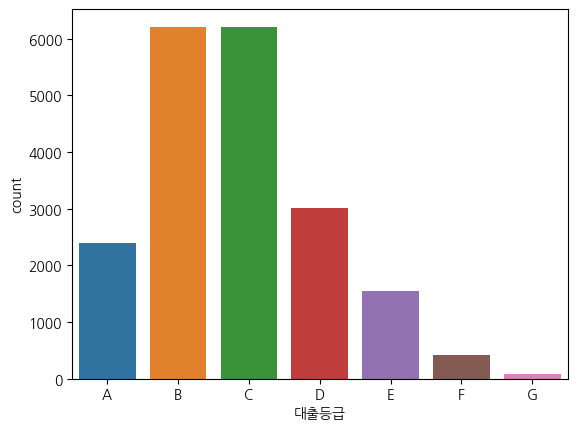

In [54]:
sns.countplot(data=test_c, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

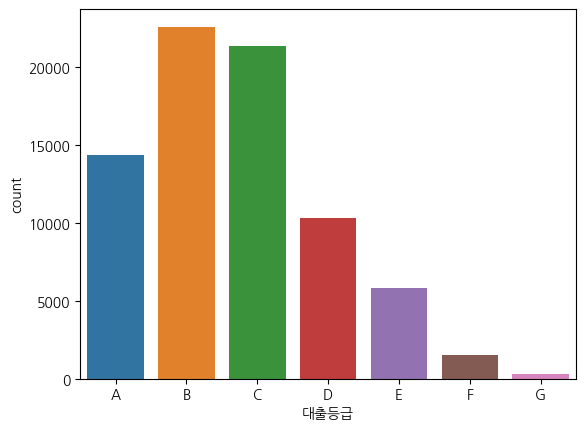

In [55]:
sns.countplot(data=test_d, x="대출등급", order=["A","B","C","D","E","F","G"])

대출등급과 최근 연쳬계좌수 비교

<Axes: xlabel='대출등급', ylabel='연체계좌수'>

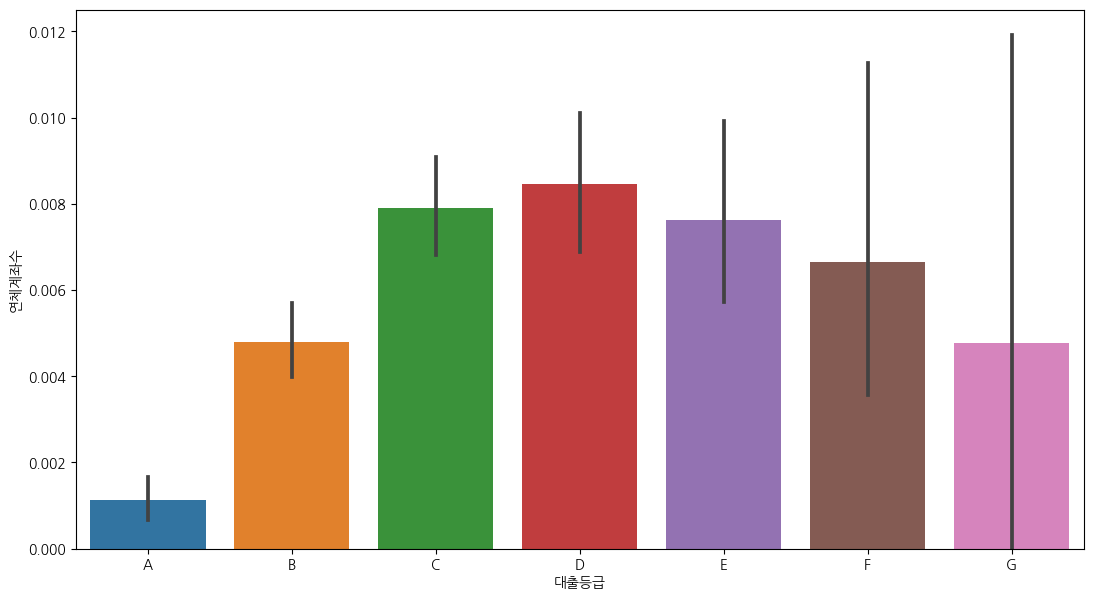

In [56]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="연체계좌수", order=["A","B","C","D","E","F","G"])

In [57]:
test_e = train[(train["연체계좌수"] > 0)]
test_f = train[(train["연체계좌수"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

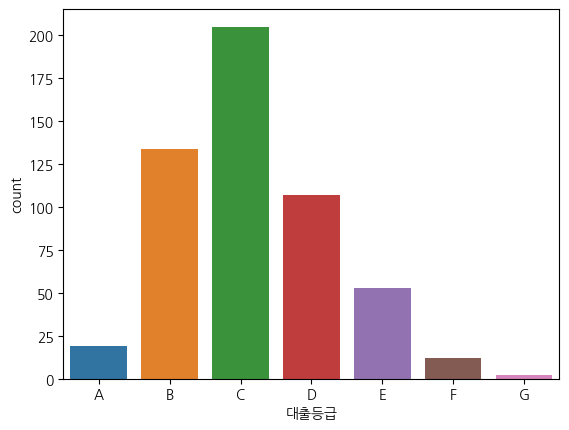

In [58]:
sns.countplot(data=test_e, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

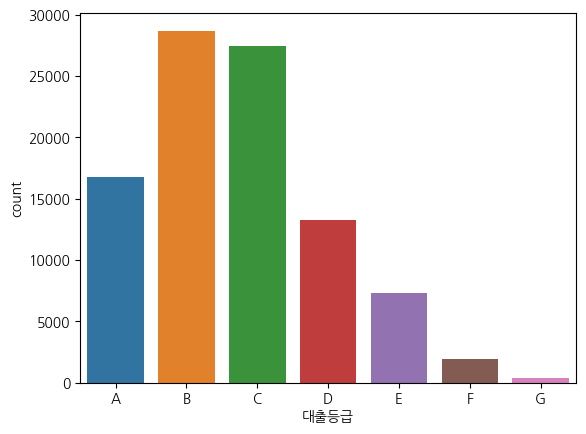

In [59]:
sns.countplot(data=test_f, x="대출등급", order=["A","B","C","D","E","F","G"])

총상환이자와 총상환원금과 대출금액

In [62]:
train["대출금액_총상환이자_비율"] = np.where(train["총상환이자"] == 0, np.nan, train["대출금액"] / train["총상환이자"])
train["대출금액_총상환이자_비율"].fillna(0, inplace=True)

In [63]:
train["대출금액_총상환원금_비율"] = np.where(train["총상환원금"] == 0, np.nan, train["대출금액"] / train["총상환원금"])
train["대출금액_총상환원금_비율"].fillna(0, inplace=True)

<Axes: xlabel='대출등급', ylabel='대출금액_총상환이자_비율'>

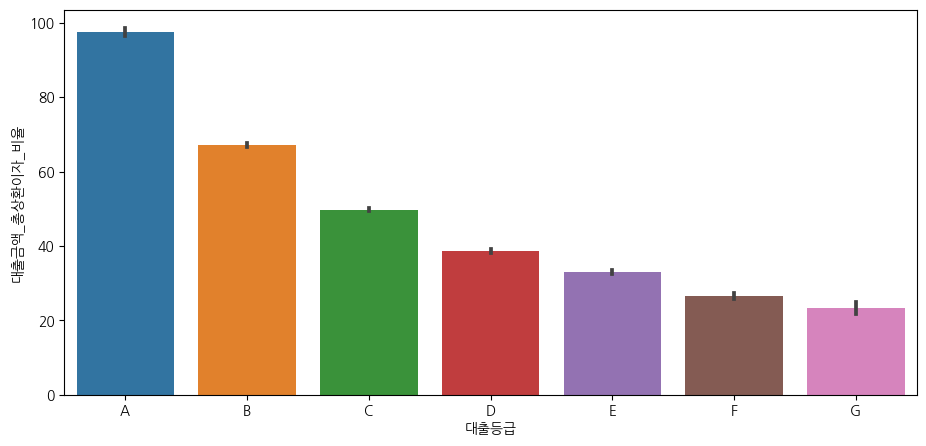

In [64]:
plt.figure(figsize=(11,5))
sns.barplot(data=train, x="대출등급", y="대출금액_총상환이자_비율", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='대출금액_총상환원금_비율'>

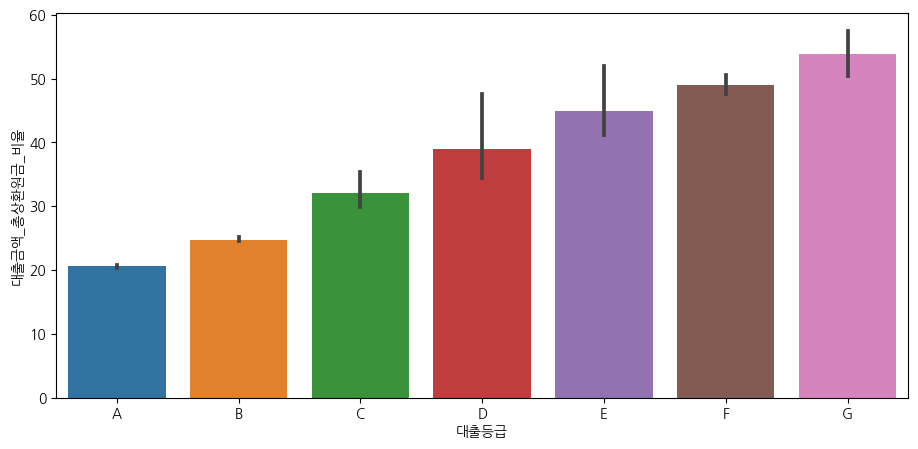

In [65]:
plt.figure(figsize=(11,5))
sns.barplot(data=train, x="대출등급", y="대출금액_총상환원금_비율", order=["A","B","C","D","E","F","G"])